In [1]:
import sys
sys.path.append("../")
import numpy as np 
from utils import *
from lattice import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensornetwork as tn

In [2]:
A = FF.block1D(2, 2, 2, seed=0).real
tmp = np.zeros((2,2))
for i in range(2):
    tmp += A[:,i,:] @ A[:,i,:].T
print(tmp)

[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[[ 1.0000000e+00 -4.4408921e-16]
 [-4.4408921e-16  1.0000000e+00]]


In [12]:
ls ../array

torch/


In [3]:
sps = 4
bd = 2
res = []
for seed in range(0, 5000):
    parent_dir = f"../array/torch/FF1D_s4/s_4_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_8000"
    try:
        u_path, lv = path_with_lowest_loss(parent_dir)
        u = np.load(u_path + "/u/0.npy")
    except:
        
#         print(f"there are no matrix under the path = {parent_dir}")
        continue
#     print(u_path)
    A = FF.block1D(bd, sps, bd, seed=seed)
    A_ = A.transpose(1,0,2)
    A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
    sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]
#     print(sle.real)
    A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
    U, s , V = np.linalg.svd(A2)
    Up = U[:, len(s):]
    h = Up @ Up.T
    max_gap = 0
    for L in range(4,5):
        H = sum_ham(h, [[i, (i + 1) % L] for i in range(L)], L, sps)
        E = np.linalg.eigvalsh(H)
        gap = E[1] - E[0]
        max_gap = max(gap, max_gap)
#         print(max_gap, seed)
    e = np.linalg.eigvalsh(h)
    h = np.load(f"../array/torch/FF1D_s4/s_4_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_8000/H/0.npy")
    U = np.kron(u,u)
    hu = U @ h @ U.T
    
    res.append({
        "seed" : seed,
        "E" : np.linalg.eigvalsh(H),
        "loss" : lv,
        "gap" : max_gap,
        "gap_loc" : e[1] - e[0],
        "gap_transfer" : sle.real[0] - sle.real[1],
        "n_0" : np.sum(np.round(hu,5) == 0)
    })
    print(f"finish seed = {seed}")

finish seed = 3000
finish seed = 3001
finish seed = 3002
finish seed = 3003
finish seed = 3004
finish seed = 3005
finish seed = 3006
finish seed = 3007
finish seed = 3008
finish seed = 3009
finish seed = 3010
finish seed = 3011
finish seed = 3012
finish seed = 3013
finish seed = 3014
finish seed = 3015
finish seed = 3016
finish seed = 3017
finish seed = 3018
finish seed = 3019
finish seed = 3020
finish seed = 3021
finish seed = 3022
finish seed = 3023
finish seed = 3024
finish seed = 3025
finish seed = 3026
finish seed = 3027
finish seed = 3028
finish seed = 3029
finish seed = 3030
finish seed = 3031
finish seed = 3032
finish seed = 3033
finish seed = 3034
finish seed = 3035
finish seed = 3036
finish seed = 3037
finish seed = 3038
finish seed = 3039
finish seed = 3040
finish seed = 3041
finish seed = 3042
finish seed = 3043
finish seed = 3044
finish seed = 3045
finish seed = 3046
finish seed = 3047
finish seed = 3048
finish seed = 3049
finish seed = 3050
finish seed = 3051
finish seed 

finish seed = 3434
finish seed = 3435
finish seed = 3436
finish seed = 3437
finish seed = 3438
finish seed = 3439
finish seed = 3440
finish seed = 3441
finish seed = 3442
finish seed = 3443
finish seed = 3444
finish seed = 3445
finish seed = 3446
finish seed = 3447
finish seed = 3448
finish seed = 3449
finish seed = 3450
finish seed = 3451
finish seed = 3452
finish seed = 3453
finish seed = 3454
finish seed = 3455
finish seed = 3456
finish seed = 3457
finish seed = 3458
finish seed = 3459
finish seed = 3460
finish seed = 3461
finish seed = 3462
finish seed = 3463
finish seed = 3464
finish seed = 3465
finish seed = 3466
finish seed = 3467
finish seed = 3468
finish seed = 3469
finish seed = 3470
finish seed = 3471
finish seed = 3472
finish seed = 3473
finish seed = 3474
finish seed = 3475
finish seed = 3476
finish seed = 3477
finish seed = 3478
finish seed = 3479
finish seed = 3480
finish seed = 3481
finish seed = 3482
finish seed = 3483
finish seed = 3484
finish seed = 3485
finish seed 

finish seed = 3868
finish seed = 3869
finish seed = 3870
finish seed = 3871
finish seed = 3872
finish seed = 3873
finish seed = 3874
finish seed = 3875
finish seed = 3876
finish seed = 3877
finish seed = 3878
finish seed = 3879
finish seed = 3880
finish seed = 3881
finish seed = 3882
finish seed = 3883
finish seed = 3884
finish seed = 3885
finish seed = 3886
finish seed = 3887
finish seed = 3888
finish seed = 3889
finish seed = 3890
finish seed = 3891
finish seed = 3892
finish seed = 3893
finish seed = 3894
finish seed = 3895
finish seed = 3896
finish seed = 3897
finish seed = 3898
finish seed = 3899
finish seed = 3900
finish seed = 3901
finish seed = 3902
finish seed = 3903
finish seed = 3904
finish seed = 3905
finish seed = 3906
finish seed = 3907
finish seed = 3908
finish seed = 3909
finish seed = 3910
finish seed = 3911
finish seed = 3912
finish seed = 3913
finish seed = 3914
finish seed = 3915
finish seed = 3916
finish seed = 3917
finish seed = 3918
finish seed = 3919
finish seed 

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(res)

### raw data

- Are loss for low gapped data necessarily small?
    - If so, below how many energy gap?
- Should it behave like linear? If so, theorically optimize the outliers upto emperical line?
 

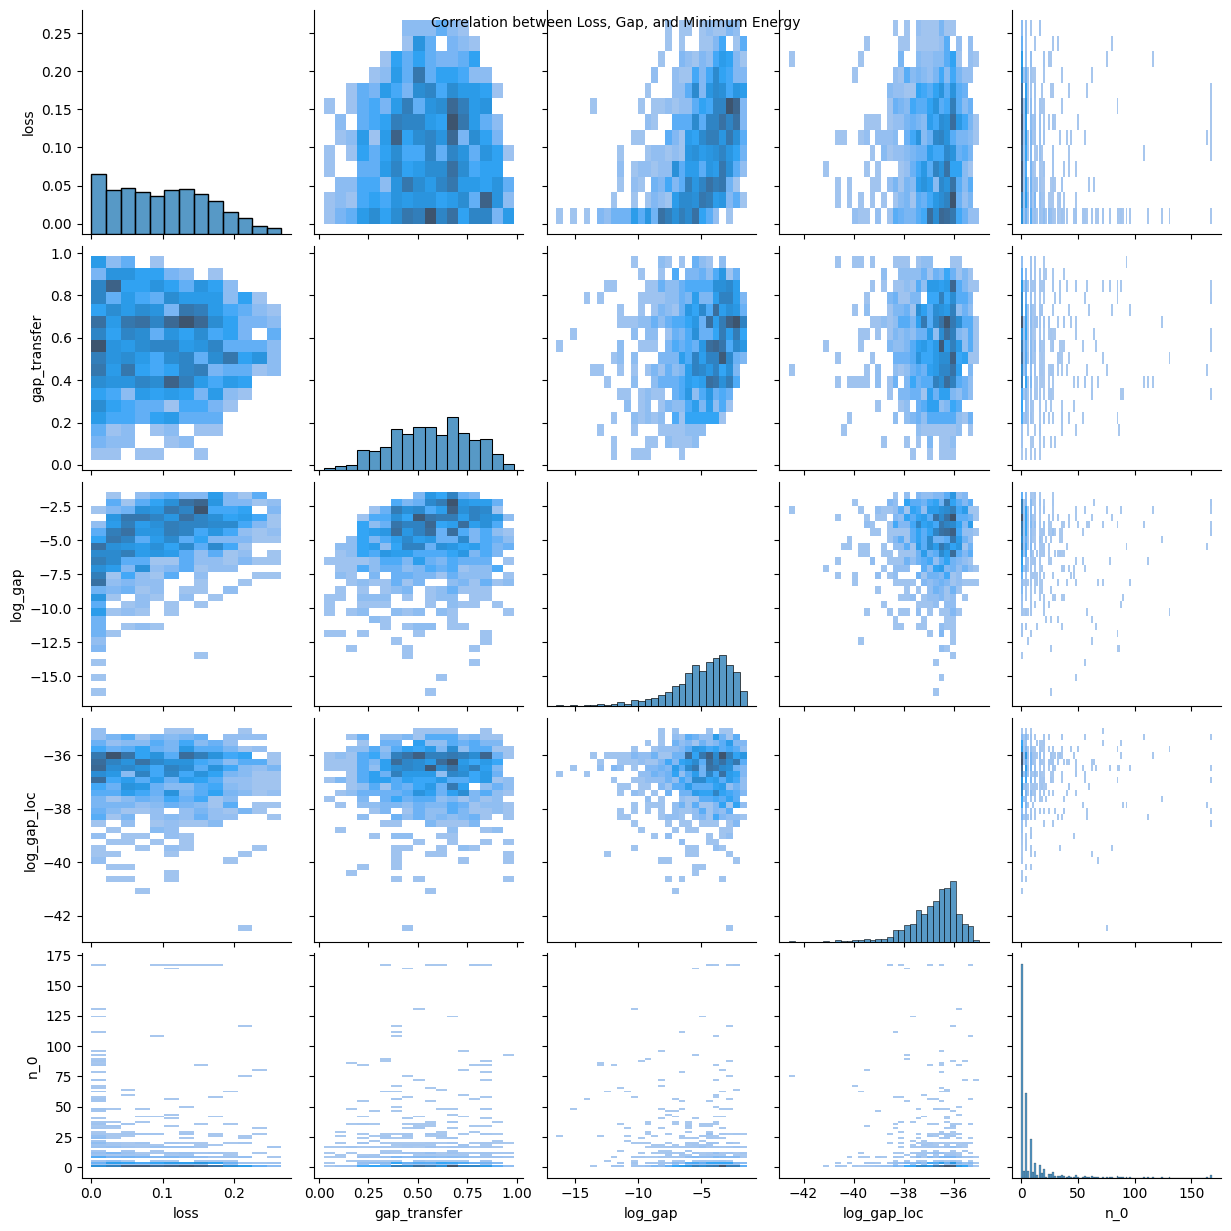

In [6]:
df = pd.DataFrame(res)
df['min_energy'] = df['E'].apply(lambda x: x[1])
df["log_gap"] = df.gap.apply(np.log)
df["log_gap_loc"] = df.gap_loc.apply(np.log)
df["log_loss"] = df.loss.apply(lambda x: np.log(x+0.0001))
# Create a pairplot to visualize the correlations between loss, gap, and minimum energy.
sns.pairplot(df[['loss', 'gap_transfer', "log_gap", "log_gap_loc", "n_0"]] , kind='hist')

# Set titles and labels.
plt.suptitle('Correlation between Loss, Gap, and Minimum Energy', size=10)
plt.show()

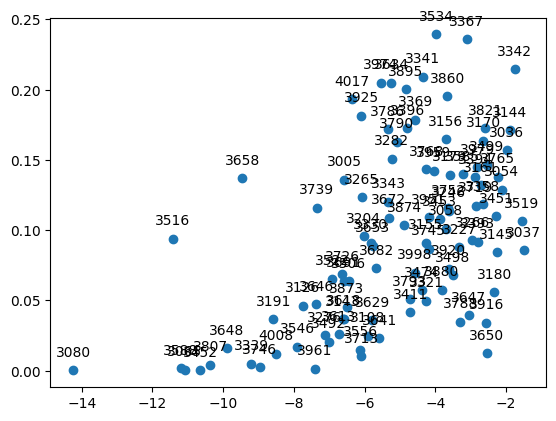

In [7]:
import matplotlib.pyplot as plt
sample_df = df.sample(100)
plt.scatter(sample_df['log_gap'], sample_df['loss'])  # Plot each point
for i in range(len(sample_df)):
    plt.annotate(sample_df['seed'].iloc[i],  # This is the text to display
                 (sample_df['log_gap'].iloc[i], sample_df['loss'].iloc[i]),  # This is the point to which the text is annotated
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

plt.show()

In [88]:
sorted_df = df.sort_values(by='n_0')
sorted_df[["loss", "n_0", "gap"]][df.n_0 == 0]

/var/folders/z7/m5qzz0hj12z06hxsn5km2c400000gn/T/ipykernel_33872/2420113439.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[["loss", "n_0", "gap"]][df.n_0 == 0]


,loss,n_0,gap
49,0.03667,0,0.019874
31,0.04916,0,0.004916
32,0.10566,0,0.035702
33,0.07125,0,0.000436
34,0.05830,0,0.015282
75,0.14551,0,0.001098
74,0.07876,0,0.003413
72,0.03498,0,0.022818
71,0.03286,0,0.018735
39,0.03873,0,0.001134


## AKLT

In [92]:
A = np.zeros((3, 2, 2))
A[0][1,0] = -1/np.sqrt(2)
A[2][0,1] = 1/np.sqrt(2)
A[1][0,0] = 1/2
A[1][1,1] = -1/2
A = get_canonical_form(A)
A_ = A.transpose(1,0,2)
A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]

ValueError: middle index should represent physical index and the side indices should be virtual indices

### Remove high gapped data
tbd

# Canonical form

In [13]:
df

,seed,E,loss,gap,sle,min_energy,log_gap,sqrt_loss,log_loss
0,0,"[1.9438717679825833e-14, 0.014409947267734775,...",0.17387,1.440995e-02,0.463733,1.440995e-02,-4.239837,0.416977,-1.748872
1,1,"[-1.5771065317389434e-15, 3.8080840688647246e-...",0.00000,3.808084e-08,0.650810,3.808084e-08,-17.083555,0.000000,-9.210340
2,2,"[-7.138036391334365e-15, 3.0888942128807335e-0...",0.00002,3.088895e-08,0.936650,3.088894e-08,-17.292867,0.004472,-9.028019
3,3,"[-7.086522186275027e-16, 0.02242465732606774, ...",0.26422,2.242466e-02,0.268709,2.242466e-02,-3.797594,0.514023,-1.330595
4,4,"[-3.078436633873759e-15, 0.012584317829214485,...",0.09499,1.258432e-02,0.330738,1.258432e-02,-4.375304,0.308204,-2.352931
...,...,...,...,...,...,...,...,...,...
95,95,"[-1.5689591293503792e-17, 1.3095670926367155e-...",0.00135,1.309567e-06,0.648040,1.309567e-06,-13.545814,0.036742,-6.536192
96,96,"[-1.017163421314269e-15, 2.4734429547128766e-1...",0.00000,2.474460e-12,0.793034,2.473443e-12,-26.724999,0.000000,-9.210340
97,97,"[-1.0692467418360418e-15, 6.729505611033403e-0...",0.00083,6.729506e-07,0.496371,6.729506e-07,-14.211594,0.028810,-6.980326
98,98,"[-1.0489672406393248e-14, 0.12618235696312238,...",0.05733,1.261824e-01,0.353133,1.261824e-01,-2.070027,0.239437,-2.857188


## Calculate transfer matrix

In [8]:
# for seed in range(0, 11):
seed = 0
A = FF.block1D(bd, sps, bd, seed=seed)
A_ = A.transpose(1,0,2)
A_tilde_ = np.einsum("ijk,ilm->jlkm", A_, A_)
A_tilde = A_tilde_.reshape(4,4)
e, V = np.linalg.eigh(A_tilde)
rho = e[-1]
A_tilde = A_tilde / rho

e, V = np.linalg.eigh(A_tilde)
x = V[:,-1].reshape(2,2)

e, U = np.linalg.eigh(x)
x_h = U @ np.diag(np.sqrt(e + 0j)) @ U.T
x_h_inv = U @ np.diag(1/np.sqrt(e + 0j)) @ U.T

B = x_h_inv @ A_ @ x_h / np.sqrt(rho) #canonical form
B = B.transpose(1,0,2)


In [9]:
check_cano = np.einsum("jik, lik->jl",B, B)
print("is identity : ",  np.linalg.norm(np.eye(2) - check_cano))

is identity :  2.9373740229761033e-16


### Spectrum must be same for A and B

In [10]:
B_ = B.transpose(1,0,2)
B_tilde_ = np.einsum("ijk,ilm->jlkm", B_, B_).reshape(4,4)
Eb = np.linalg.eigvals(B_tilde_)
Ea = np.linalg.eigvals(A_tilde)
print(np.linalg.norm(Ea.real - Eb.real))
print(Eb[1].real)
print(Ea[1])

2.665835984225005e-16
0.46373257491552144
0.4637325749155212


### aggrigate all second largest eigenvalue and store into dataframe 

### Check both actually return same MPS

In [118]:
mps_nodes, mps_edges = FF.create_MPS(6, A)
for k in range(len(mps_edges)):
    C = tn.contract(mps_edges[k])
y1 = C.tensor.reshape(-1)
y1 /= np.linalg.norm(y1)

mps_nodes, mps_edges = FF.create_MPS(6, B)
for k in range(len(mps_edges)):
    C = tn.contract(mps_edges[k])
y2 = C.tensor.reshape(-1)
y2 /= np.linalg.norm(y2)
print("y1 - y2 : ", np.linalg.norm(y1-y2))

y1 - y2 :  8.987388080934195e-16


In [165]:
Ea, Eb

(array([1.        , 0.46373257, 0.1586023 , 0.12083966]),
 array([1.        +0.j, 0.46373257+0.j, 0.1586023 +0.j, 0.12083966+0.j]))

In [37]:
for key, val in res.items():
    print(f'loss: {val["loss"]}')
    print(f'gap : {val["gap"]}')
    print(f"et : {val['et']}")
    print(f"et2 : {val['et2']}")
    print("\n")

loss: 0.17387
gap : 0.014409947267715335
et : [1.07903285 1.41623274 4.14088113 8.92945925]
et2 : [ 1.16431189  2.00571517 17.14689655 79.73524257]


loss: 0.0
gap : 3.808084226575378e-08
et : [-3.52683104 -2.4892931   3.46655985  5.3265312 ]
et2 : [ 6.19658016 12.01703717 12.43853718 28.37193457]


loss: 2e-05
gap : 3.088894926684373e-08
et : [-1.80583275 -1.69885453  7.63632091  8.15280263]
et2 : [ 2.8861067   3.26103194 58.31339699 66.46819078]


loss: 0.26422
gap : 0.022424657326068447
et : [-3.0497284  -0.4825839   1.14272441  4.25264852]
et2 : [ 0.23288722  1.30581908  9.30084333 18.08501945]


loss: 0.09499
gap : 0.012584317829217564
et : [0.7080587  0.83183422 0.92752041 2.80439502]
et2 : [0.50134713 0.69194816 0.86029412 7.86463145]


loss: 0.06638
gap : 0.00510515577127765
et : [-1.50881426 -0.8815801   0.66147717  6.17440182]
et2 : [ 0.43755205  0.77718348  2.27652046 38.12323784]


loss: 0.027
gap : 0.00046814891419191395
et : [-5.25731758 -2.88693889  2.25853235 12.8175936